# Artificial Neural Networks
# Practical 7

In [12]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [13]:
X = load_boston().data
Y = load_boston().target

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [15]:
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
X_train = pd.DataFrame(data = X_train, columns=load_boston().feature_names)
X_train['Price'] = list(y_train)  
X_test = pd.DataFrame(data = X_test, columns=load_boston().feature_names)
X_test['Price'] = list(y_test)

In [17]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,-0.207356,-0.499979,1.548016,-0.263603,0.588213,-1.839367,1.107402,-1.125110,-0.618160,0.206735,1.227257,0.424543,3.108073,14.4
1,-0.388865,0.346774,-0.589747,-0.263603,-0.797821,0.327487,-0.367661,0.075090,-0.733637,-1.049493,0.056963,0.401853,-0.666430,24.4
2,-0.335735,-0.499979,1.548016,-0.263603,0.588213,0.037907,1.043114,-0.799984,-0.618160,0.206735,1.227257,0.398461,0.639367,18.1
3,-0.394852,2.463658,-1.265584,-0.263603,-1.352235,0.052172,-1.746292,1.968937,-0.502683,-0.257013,-1.653466,0.089342,-1.056896,22.5
4,-0.391456,-0.499979,2.086394,-0.263603,0.215716,-0.495604,0.853820,-0.811511,-0.849114,-1.254951,0.282020,0.204545,0.776596,20.5


In [18]:
def sgd_regressor(X, y, learning_rate=0.2, n_epochs=1000, k=40):
    
    w = np.random.randn(1,13)  # Randomly initializing weights
    b = np.random.randn(1,1)   # Random intercept value
    
    epoch=1
    
    while epoch <= n_epochs:
        
        temp = X.sample(k)

        X_tr = temp.iloc[:,0:13].values
        y_tr = temp.iloc[:,-1].values
        
        Lw = w
        Lb = b
        
        loss = 0
        y_pred = []
        sq_loss = []
        
        for i in range(k):
              
            Lw = (-2/k * X_tr[i]) * (y_tr[i] - np.dot(X_tr[i],w.T) - b)
            Lb = (-2/k) * (y_tr[i] - np.dot(X_tr[i],w.T) - b)
            
            w = w - learning_rate * Lw
            b = b - learning_rate * Lb
            
            y_predicted = np.dot(X_tr[i],w.T)
            y_pred.append(y_predicted)
        
        loss = mean_squared_error(y_pred, y_tr)
            
        print("Epoch: %d, Loss: %.3f" %(epoch, loss))
        epoch+=1
        learning_rate = learning_rate/1.02
        
    return w,b

def predict(x,w,b):
    y_pred=[]
    for i in range(len(x)):
        temp_ = x
        X_test = temp_.iloc[:,0:13].values
        y = np.asscalar(np.dot(w,X_test[i])+b)
        y_pred.append(y)
    return np.array(y_pred)


Epoch: 1, Loss: 514.266
Epoch: 2, Loss: 533.062
Epoch: 3, Loss: 469.300
Epoch: 4, Loss: 535.644
Epoch: 5, Loss: 489.216
Epoch: 6, Loss: 536.810
Epoch: 7, Loss: 557.948
Epoch: 8, Loss: 512.939
Epoch: 9, Loss: 486.337
Epoch: 10, Loss: 485.904
Epoch: 11, Loss: 547.163
Epoch: 12, Loss: 560.156
Epoch: 13, Loss: 476.841
Epoch: 14, Loss: 515.518
Epoch: 15, Loss: 476.495
Epoch: 16, Loss: 547.737
Epoch: 17, Loss: 546.678
Epoch: 18, Loss: 545.985
Epoch: 19, Loss: 486.293
Epoch: 20, Loss: 512.032
Epoch: 21, Loss: 496.255
Epoch: 22, Loss: 553.309
Epoch: 23, Loss: 546.341
Epoch: 24, Loss: 555.423
Epoch: 25, Loss: 556.328
Epoch: 26, Loss: 517.937
Epoch: 27, Loss: 544.191
Epoch: 28, Loss: 489.484
Epoch: 29, Loss: 531.347
Epoch: 30, Loss: 535.023
Epoch: 31, Loss: 518.312
Epoch: 32, Loss: 515.300
Epoch: 33, Loss: 549.619
Epoch: 34, Loss: 523.284
Epoch: 35, Loss: 487.498
Epoch: 36, Loss: 608.305
Epoch: 37, Loss: 545.824
Epoch: 38, Loss: 533.725
Epoch: 39, Loss: 553.146
Epoch: 40, Loss: 576.099
Epoch: 41

Epoch: 390, Loss: 581.282
Epoch: 391, Loss: 594.311
Epoch: 392, Loss: 516.282
Epoch: 393, Loss: 510.473
Epoch: 394, Loss: 499.164
Epoch: 395, Loss: 540.416
Epoch: 396, Loss: 496.581
Epoch: 397, Loss: 544.341
Epoch: 398, Loss: 527.801
Epoch: 399, Loss: 493.484
Epoch: 400, Loss: 506.501
Epoch: 401, Loss: 529.430
Epoch: 402, Loss: 483.841
Epoch: 403, Loss: 591.636
Epoch: 404, Loss: 605.833
Epoch: 405, Loss: 501.306
Epoch: 406, Loss: 502.022
Epoch: 407, Loss: 497.694
Epoch: 408, Loss: 512.132
Epoch: 409, Loss: 532.262
Epoch: 410, Loss: 533.014
Epoch: 411, Loss: 524.177
Epoch: 412, Loss: 526.604
Epoch: 413, Loss: 541.108
Epoch: 414, Loss: 534.134
Epoch: 415, Loss: 567.458
Epoch: 416, Loss: 578.621
Epoch: 417, Loss: 488.307
Epoch: 418, Loss: 541.525
Epoch: 419, Loss: 500.368
Epoch: 420, Loss: 475.519
Epoch: 421, Loss: 565.646
Epoch: 422, Loss: 502.814
Epoch: 423, Loss: 529.264
Epoch: 424, Loss: 508.998
Epoch: 425, Loss: 512.840
Epoch: 426, Loss: 529.409
Epoch: 427, Loss: 479.935
Epoch: 428, 

Epoch: 796, Loss: 548.463
Epoch: 797, Loss: 563.810
Epoch: 798, Loss: 482.887
Epoch: 799, Loss: 514.743
Epoch: 800, Loss: 546.546
Epoch: 801, Loss: 561.999
Epoch: 802, Loss: 583.287
Epoch: 803, Loss: 501.225
Epoch: 804, Loss: 545.063
Epoch: 805, Loss: 552.605
Epoch: 806, Loss: 500.744
Epoch: 807, Loss: 545.718
Epoch: 808, Loss: 538.829
Epoch: 809, Loss: 512.908
Epoch: 810, Loss: 548.836
Epoch: 811, Loss: 565.231
Epoch: 812, Loss: 517.654
Epoch: 813, Loss: 505.310
Epoch: 814, Loss: 565.799
Epoch: 815, Loss: 527.013
Epoch: 816, Loss: 536.127
Epoch: 817, Loss: 528.580
Epoch: 818, Loss: 511.458
Epoch: 819, Loss: 480.182
Epoch: 820, Loss: 534.160
Epoch: 821, Loss: 485.942
Epoch: 822, Loss: 498.323
Epoch: 823, Loss: 470.241
Epoch: 824, Loss: 574.334
Epoch: 825, Loss: 556.090
Epoch: 826, Loss: 603.122
Epoch: 827, Loss: 521.932
Epoch: 828, Loss: 545.391
Epoch: 829, Loss: 495.266
Epoch: 830, Loss: 519.898
Epoch: 831, Loss: 553.483
Epoch: 832, Loss: 536.581
Epoch: 833, Loss: 482.988
Epoch: 834, 

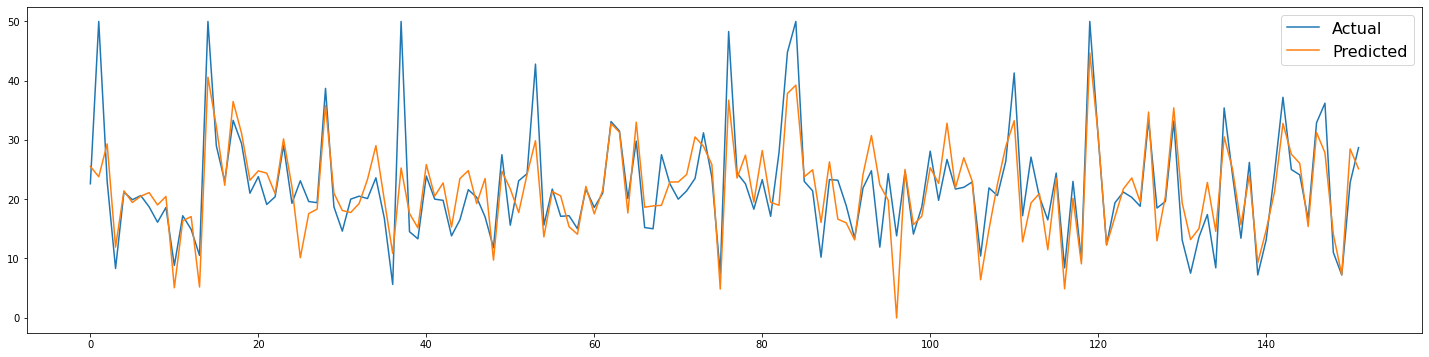

Mean Squared Error : 27.312092391942375


In [19]:
w,b = sgd_regressor(X_train,y_train)
y_pred_customsgd = predict(X_test,w,b)

from matplotlib.pyplot import figure
plt.figure(figsize=(25,6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_customsgd, label='Predicted')
plt.legend(prop={'size': 16})
plt.show()
print('Mean Squared Error :',mean_squared_error(y_test, y_pred_customsgd))




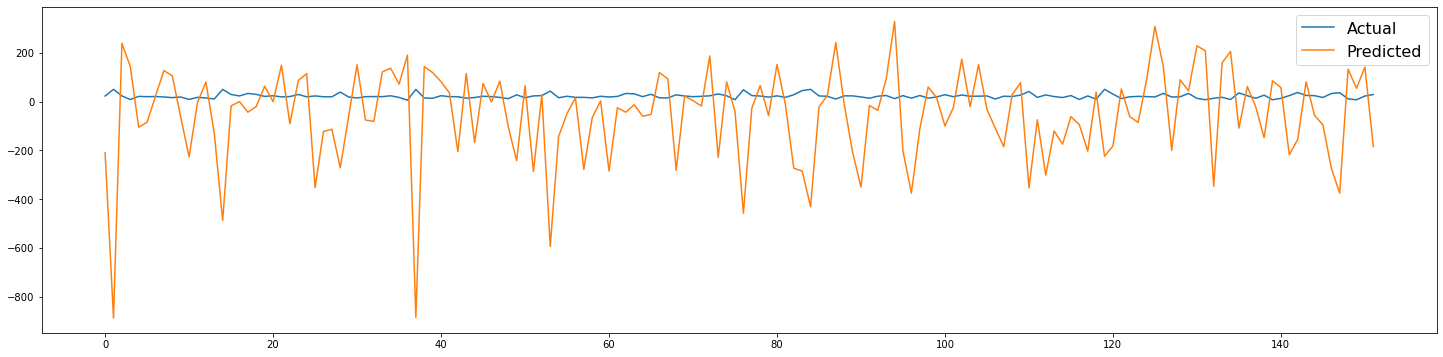

Mean Squared Error : 44800.90201553445


In [20]:

from sklearn.linear_model import SGDRegressor
clf = SGDRegressor(max_iter=1000, tol=1e-3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.figure(figsize=(25,6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend(prop={'size': 16})
plt.show()
print('Mean Squared Error :',mean_squared_error(y_test, y_pred))


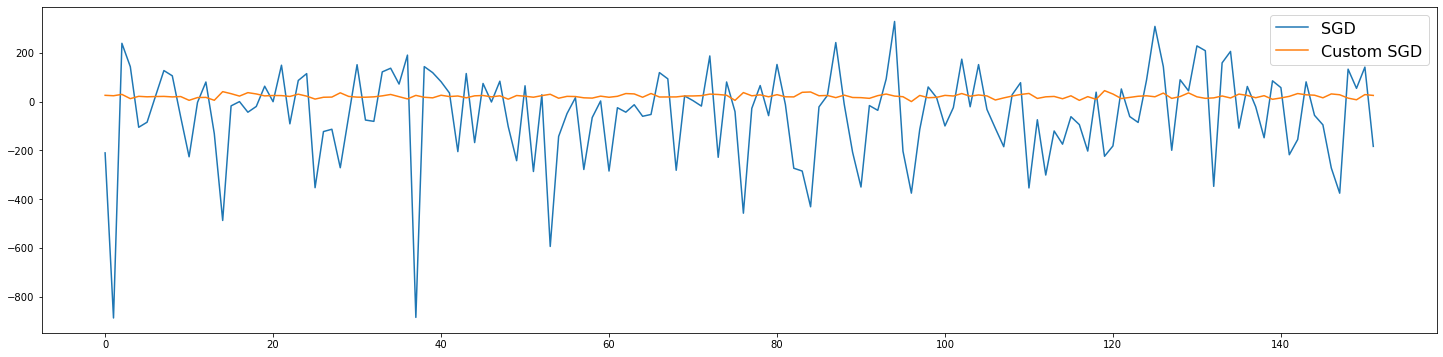

Mean Squared Error of Custom SGD : 27.312092391942375
Mean Squared Error of SKlearn's SGD : 44800.90201553445


In [21]:

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.figure(figsize=(25,6))
plt.plot(y_pred, label='SGD')
plt.plot(y_pred_customsgd, label='Custom SGD')
plt.legend(prop={'size': 16})
plt.show()
print('Mean Squared Error of Custom SGD :',mean_squared_error(y_test, y_pred_customsgd))
print("Mean Squared Error of SKlearn's SGD :",mean_squared_error(y_test, y_pred))

